# Producing the table and figure for electricity with prehistory

The following cell is for producing the left panel of Figure S.9 in the supplementary material.

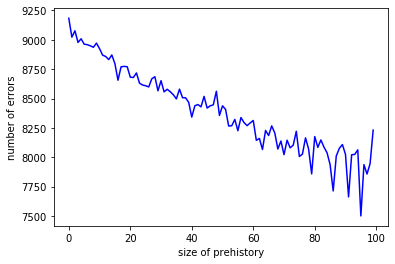

Time elapsed: 162.3613657951355


In [1]:
# Parameters:
N_train = 10000  # the size of the training set
PH_range = 100  # the range for the size of prehistory

import time
start = time.time()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier

electricity = fetch_openml(name='electricity', version=1)
N_full = electricity.data.shape[0]   # the full size of the dataset
N_old_features = electricity.data.shape[1]   # the number of features in the existing dataset

X_full = electricity.data[:]    # matrix of all objects
yy_full = electricity.target[:] # vector of all labels (UP or DOWN)

# turning the labels into 0 (DOWN) or 1 (UP)
y_full = np.empty(N_full)
for i in range(N_full):
  if yy_full[i]=="UP":
    y_full[i] = 1
  else:
    y_full[i] = 0

num_errors = np.empty(PH_range)  # array for remembering the numbers of errors (as function of the prehistory size)
for PH_size in range(PH_range):
  N_total = N_full - PH_size  # the total size of the dataset with prehistory
  N_test = N_total - N_train  # the size of the test set
  N_features = N_old_features + PH_size  # the new number of features (with prehistory)
  # adding pre-history of size PH
  X_total = np.empty((N_total,N_features))
  for i in range(N_total):
    X_total[i,0:N_old_features] = X_full[i+PH_size,:]   # the old features
    X_total[i,N_old_features:N_features] = y_full[i:(i+PH_size)]  # the prehistory

  # Other views of the data:
  X_train = X_total[0:N_train]   # matrix of training objects
  y_train = y_full[PH_size:(PH_size+N_train)] # vector of training labels (0 or 1)
  X_test = X_total[N_train:]   # matrix of test objects
  y_test = y_full[(PH_size+N_train):] # vector of test labels (0 or 1)

  # Now let us do scaling:
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Now doing the prediction:
  forest = RandomForestClassifier(random_state=2021).fit(X_train, y_train)
  # Evaluating the quality:
  y_pred = forest.predict(X_test)
  num_errors[PH_size] = np.sum(y_test!=y_pred)

plt.plot(num_errors,c='b')
plt.xlabel('size of prehistory')
plt.ylabel('number of errors')
# plt.savefig("errors_vs_prehistory.pdf", bbox_inches='tight')
plt.show()

# finding time elapsed in seconds
end = time.time()
print("Time elapsed:", end - start)